In [1]:
# pip install modvis

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import sys, os
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import linregress

## Reading 'base_calibrated-wb-2014_2022-GW.csv'

In [2]:
surf_area = 53159325.46184719

In [4]:
df = pd.read_csv(os.path.join('base_calibrated-wb-2014_2022-GW.csv'), comment='#')

df['datetime'] = pd.to_datetime(df['datetime'])
df = df[df['datetime'] >= '10-01-2015']

df

,datetime,time [d],exfiltration [mol d^-1],infiltration [mol d^-1],net exchange flux [mol d^-1],watershed boundary discharge [mol d^-1],net runoff [mol d^-1],net groundwater flux [mol d^-1],total evapotranspiration [m d^-1],snow precipitation [m d^-1],...,snowmelt [mm d^-1],watershed boundary discharge [m^3/d],watershed boundary discharge [m/d],total evapotranspiration [mm d^-1],snow water content [m],surface water content [m],subsurface water content [m],exfiltration [m d^-1],canopy water content [m],total water content [m]
365,2015-10-01,13048.0,1.155324e+10,-8.022933e+09,3.530306e+09,3.390512e+09,3.390512e+09,-2.402186e-07,0.001205,0.0,...,0.0,61090.302051,0.001149,1.205332,0.0,0.017335,3.481400,0.003916,0.000001,3.498737
366,2015-10-02,13049.0,1.129233e+10,-7.813387e+09,3.478945e+09,3.293123e+09,3.293123e+09,-2.940728e-08,0.001058,0.0,...,0.0,59335.552198,0.001116,1.057681,0.0,0.017296,3.479266,0.003827,0.000001,3.496563
367,2015-10-03,13050.0,1.104122e+10,-7.665558e+09,3.375665e+09,3.227393e+09,3.227393e+09,5.158616e-07,0.001172,0.0,...,0.0,58151.231666,0.001094,1.171870,0.0,0.017246,3.477050,0.003742,0.000001,3.494297
368,2015-10-04,13051.0,1.080164e+10,-7.517201e+09,3.284442e+09,3.129997e+09,3.129997e+09,3.621852e-07,0.001216,0.0,...,0.0,56396.345713,0.001061,1.216328,0.0,0.017196,3.474823,0.003661,0.000001,3.492020
369,2015-10-05,13052.0,1.059715e+10,-7.407804e+09,3.189345e+09,3.105147e+09,3.105147e+09,1.369985e-08,0.000815,0.0,...,0.0,55948.595824,0.001052,0.815387,0.0,0.017144,3.473006,0.003592,0.000001,3.490152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-09-28,15600.0,4.664067e+09,-3.558090e+09,1.105977e+09,1.070042e+09,1.070042e+09,6.438097e-08,0.001149,0.0,...,0.0,19280.042505,0.000363,1.148807,0.0,0.013702,3.380762,0.001581,0.000002,3.394466
2918,2022-09-29,15601.0,4.577719e+09,-3.467376e+09,1.110343e+09,1.038712e+09,1.038712e+09,1.954883e-08,0.001153,0.0,...,0.0,18715.525922,0.000352,1.152998,0.0,0.013674,3.379285,0.001552,0.000002,3.392961
2919,2022-09-30,15602.0,4.564457e+09,-1.003656e+10,-5.472102e+09,1.098445e+09,1.098445e+09,-6.853306e-08,0.000633,0.0,...,0.0,19791.807764,0.000372,0.633011,0.0,0.013719,3.380667,0.001547,0.000097,3.394483
2920,2022-10-01,15603.0,4.806312e+09,-1.869098e+10,-1.388466e+10,1.355162e+09,1.355162e+09,-1.393625e-07,0.000155,0.0,...,0.0,24417.339349,0.000459,0.154699,0.0,0.013803,3.385373,0.001629,0.000099,3.399275


In [5]:
df.columns

Index(['datetime', 'time [d]', 'exfiltration [mol d^-1]',
       'infiltration [mol d^-1]', 'net exchange flux [mol d^-1]',
       'watershed boundary discharge [mol d^-1]', 'net runoff [mol d^-1]',
       'net groundwater flux [mol d^-1]', 'total evapotranspiration [m d^-1]',
       'snow precipitation [m d^-1]', 'rain precipitation [m d^-1]',
       'surface air temperature [K]', 'incoming shortwave radiation [W m^-2]',
       'incident shortwave radiation [W m^-2]', 'surface water content [mol]',
       'subsurface water content [mol]', 'snow water content [mol]',
       'canopy water content [mol]', 'snow evaporation [m d^-1]',
       'surface evaporation [m d^-1]', 'transpiration [m d^-1]',
       'canopy evaporation [m d^-1]', 'canopy drainage [m d^-1]',
       'water to surface [m d^-1]', 'snow to surface [m SWE d^-1]',
       'snowmelt [m d^-1]', 'max ponded depth [m]', 'SWE [m]',
       'canopy interception [m d^-1]', 'net groundwater flux [m^3/d]',
       'net groundwater flu

## convert data to cms and plot it

In [6]:
df['watershed boundary discharge [m3 s^-1]'] = df['watershed boundary discharge [mol d^-1]']/55500/24/60/60

df['exfiltration [m3 s^-1]'] = df['exfiltration [mol d^-1]']/55500/24/60/60

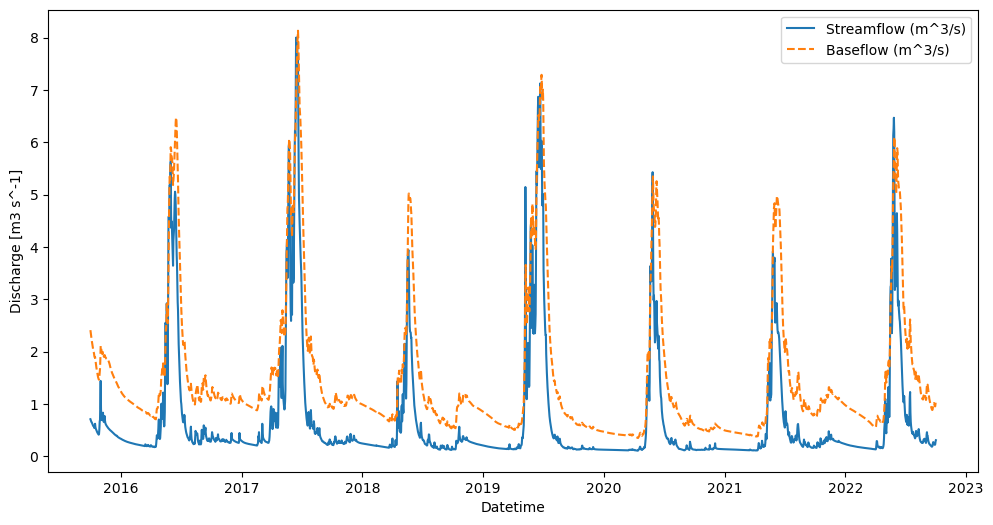

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(df['datetime'], df['watershed boundary discharge [m3 s^-1]'], label='Streamflow (m^3/s)')
plt.plot(df['datetime'], df['exfiltration [m3 s^-1]'], label='Baseflow (m^3/s)', linestyle='--')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 s^-1]')

# Adding legend
plt.legend()
plt.savefig('original_baseflow_numerical_method.png', dpi = 600)
plt.show()

## Calibrating the baseflow to match the lowflow by dividing the baseflow by the calibration factor 5.6701

In [8]:
## dividing by this factor
df['calibrated_exfiltration [m3 s^-1]'] = df['exfiltration [mol d^-1]']/55500/24/60/60/5.6701

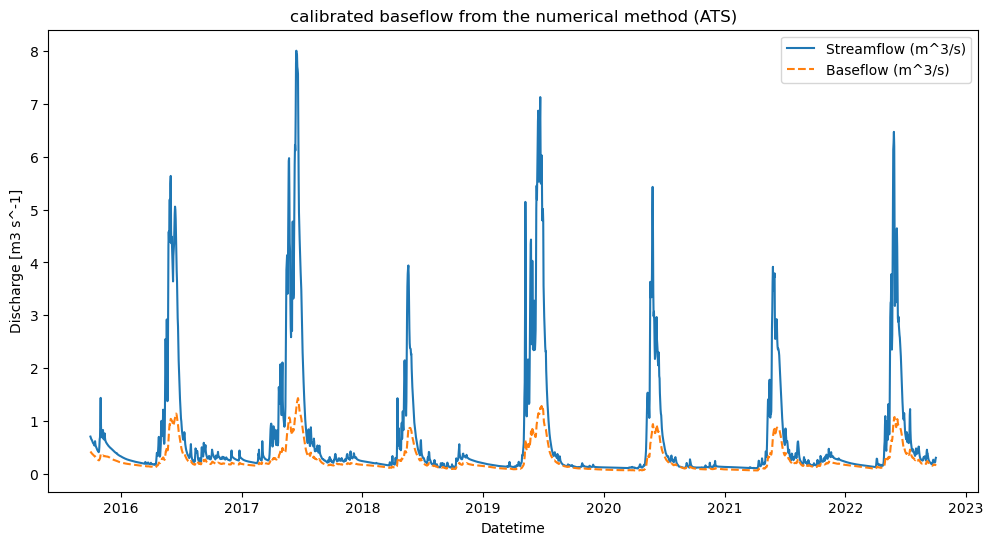

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(df['datetime'], df['watershed boundary discharge [m3 s^-1]'], label='Streamflow (m^3/s)')
plt.plot(df['datetime'], df['calibrated_exfiltration [m3 s^-1]'], label='Baseflow (m^3/s)', linestyle='--')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 s^-1]')
plt.title('calibrated baseflow from the numerical method (ATS)')
# Adding legend
plt.legend()
plt.savefig('calibration_numerical_baseflow.png', dpi=600)
plt.show()

In [10]:
# checking if baseflow exceeded the streamflow
df['exfiltration_greater'] = df['calibrated_exfiltration [m3 s^-1]'] > df['watershed boundary discharge [m3 s^-1]']
greater_exfiltration_df = df[df['exfiltration_greater']]

# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered Data", dataframe=greater_exfiltration_df)

greater_exfiltration_df

,datetime,time [d],exfiltration [mol d^-1],infiltration [mol d^-1],net exchange flux [mol d^-1],watershed boundary discharge [mol d^-1],net runoff [mol d^-1],net groundwater flux [mol d^-1],total evapotranspiration [m d^-1],snow precipitation [m d^-1],...,snow water content [m],surface water content [m],subsurface water content [m],exfiltration [m d^-1],canopy water content [m],total water content [m],watershed boundary discharge [m3 s^-1],exfiltration [m3 s^-1],calibrated_exfiltration [m3 s^-1],exfiltration_greater


## Assume that the infiltration is zero when rainfall and snowmelt are zero. filter the rows that apply these conditions and assume that the baseflow is equal to water content change - transpiration. Plot the baseflow of the dry period

In [11]:
df['infiltration [m d^-1]'] =  df['infiltration [mol d^-1]']/55500./surf_area
df['net runoff [m d^-1]'] = df['net runoff [mol d^-1]']/55500./surf_area
df['subsurface water content [m]'] = df['subsurface water content [mol]'] / 55500 / surf_area
df['subsurface water content change [m d^-1]'] = df['subsurface water content [m]'].diff()



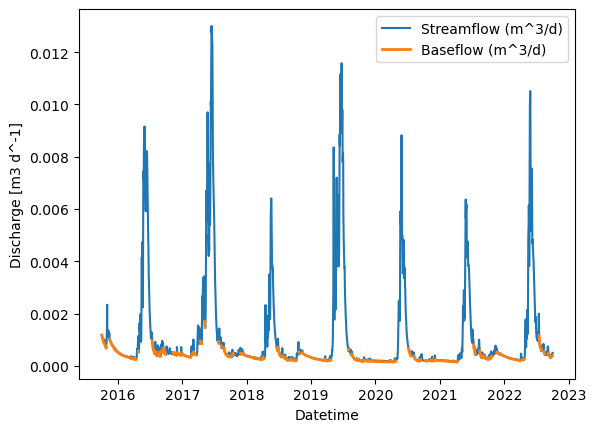

In [12]:
df['GW_discharge [m d^-1]'] =  -df['subsurface water content change [m d^-1]'] - df['transpiration [m d^-1]']
df['GW_discharge_new_dryperiod [m d^-1]'] = df.apply(
    lambda row: row['GW_discharge [m d^-1]'] if row['snowmelt [m d^-1]'] == 0 and row['rain precipitation [m d^-1]'] == 0 
    else np.nan,
    axis=1)

plt.figure()
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/d)')
plt.plot(df['datetime'], df['GW_discharge_new_dryperiod [m d^-1]'], label='Baseflow (m^3/d)', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 d^-1]')
plt.legend()
plt.show()

## calculation of reinfiltration of the dry season: rainfall and snowmelt are null, meaning no infiltration:

In [13]:
# df['reinfiltration [m d^-1]'] =  -df['subsurface water content change [m d^-1]'] - df['transpiration [m d^-1]']
df['reinfiltration_new_dryperiod [m d^-1]'] = df.apply(
    lambda row: row['exfiltration [m d^-1]'] - row['GW_discharge_new_dryperiod [m d^-1]'] if row['snowmelt [m d^-1]'] == 0 and row['rain precipitation [m d^-1]'] == 0 
    else np.nan,
    axis=1)

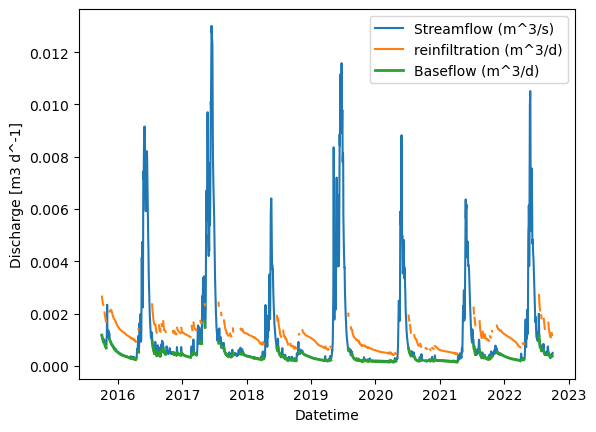

In [14]:
plt.figure()
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/s)')
plt.plot(df['datetime'], df['reinfiltration_new_dryperiod [m d^-1]'], label='reinfiltration (m^3/d)')
plt.plot(df['datetime'], df['GW_discharge_new_dryperiod [m d^-1]'], label='Baseflow (m^3/d)', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 d^-1]')
plt.legend()
plt.show()

## find the relationship between reinfiltration and streamflow. Use this relationship to find the continuous reinfiltration and then plot baseflow = exfiltration - reinfiltration

#### try linear relationship

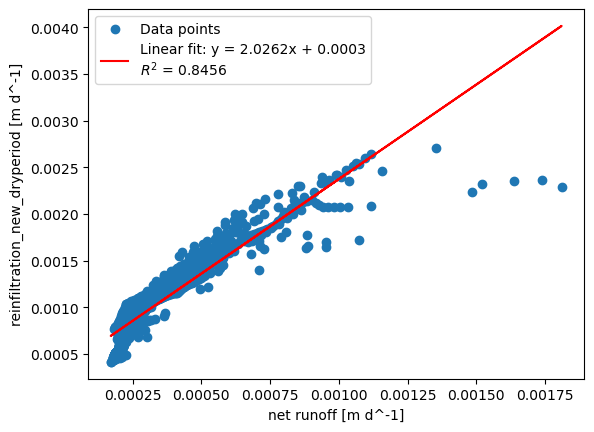

In [15]:
filtered_df = df.dropna(subset=['reinfiltration_new_dryperiod [m d^-1]'])

x = filtered_df['net runoff [m d^-1]']
y = filtered_df['reinfiltration_new_dryperiod [m d^-1]']


plt.figure()
plt.scatter(x, y, label='Data points')
plt.xlabel('net runoff [m d^-1]')
plt.ylabel('reinfiltration_new_dryperiod [m d^-1]')

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, slope * x + intercept, color='red', label=f'Linear fit: y = {slope:.4f}x + {intercept:.4f}\n$R^2$ = {r_value**2:.4f}')
plt.legend()
plt.show()


#### try logarithmic relationship

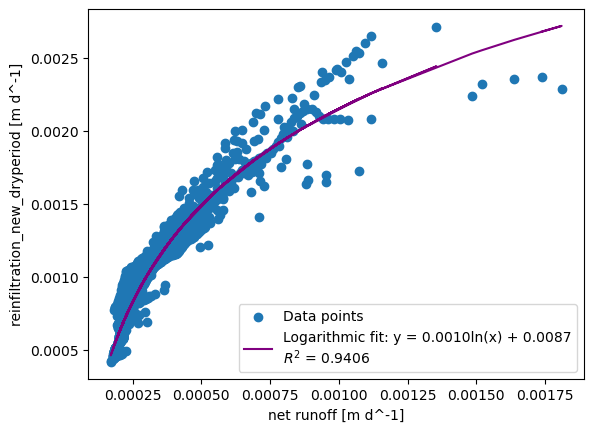

In [16]:
sorted_filtered_df = filtered_df.sort_values(by='GW_discharge_new_dryperiod [m d^-1]')
x = sorted_filtered_df['net runoff [m d^-1]']
y = sorted_filtered_df['reinfiltration_new_dryperiod [m d^-1]']
def log_func(x, a, b):
    return a * np.log(x) + b

popt_log, pcov_log = curve_fit(log_func, x, y)
a_log, b_log = popt_log

y_log_fit = log_func(x, *popt_log)

residuals = y - y_log_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

plt.figure()
plt.scatter(x, y, label='Data points')
plt.plot(x, y_log_fit, color='purple', label=f'Logarithmic fit: y = {a_log:.4f}ln(x) + {b_log:.4f}\n$R^2$ = {r_squared:.4f}')
plt.xlabel('net runoff [m d^-1]')
plt.ylabel('reinfiltration_new_dryperiod [m d^-1]')
plt.legend()
plt.show()

#### find daily reinfiltration using the logarithmic function:

In [17]:
def calculate_y(net_runoff):
    return 0.001 * np.log(net_runoff) + 0.0087

df['daily_reinfiltration_log [m d^-1]'] = df['net runoff [m d^-1]'].apply(calculate_y)

#### find daily daily baseflow = exfiltration - reinfiltration (logarithmic function)

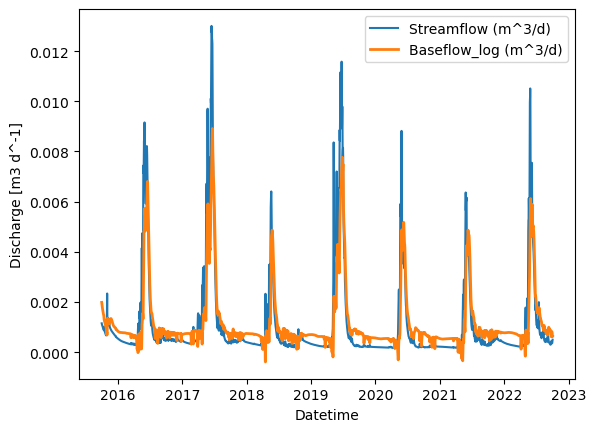

In [18]:
df['baseflow_log [m d^-1]'] = df['exfiltration [m d^-1]'] - df['daily_reinfiltration_log [m d^-1]']

plt.figure()
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/d)')
plt.plot(df['datetime'], df['baseflow_log [m d^-1]'], label='Baseflow_log (m^3/d)', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 d^-1]')
plt.legend()
plt.show()

#### find daily reinfiltration and baseflow using the linear function:

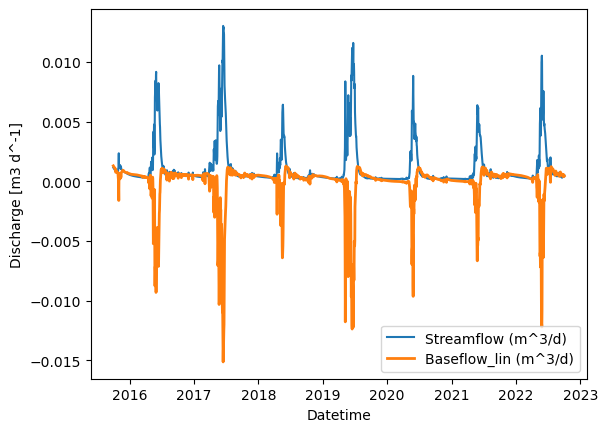

In [19]:
df['daily_reinfiltration_lin [m d^-1]'] = 2.0262 * df['net runoff [m d^-1]'] + 0.0003
df['baseflow_lin [m d^-1]'] = df['exfiltration [m d^-1]'] - df['daily_reinfiltration_lin [m d^-1]']

plt.figure()
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/d)')
plt.plot(df['datetime'], df['baseflow_lin [m d^-1]'], label='Baseflow_lin (m^3/d)', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 d^-1]')
plt.legend()
plt.show()

# **The valid method starts here:**

## find the relationship between reinfiltration and exfiltration. Use this relationship to find the continuous reinfiltration and then plot baseflow = exfiltration - reinfiltration

#### try linear relationship

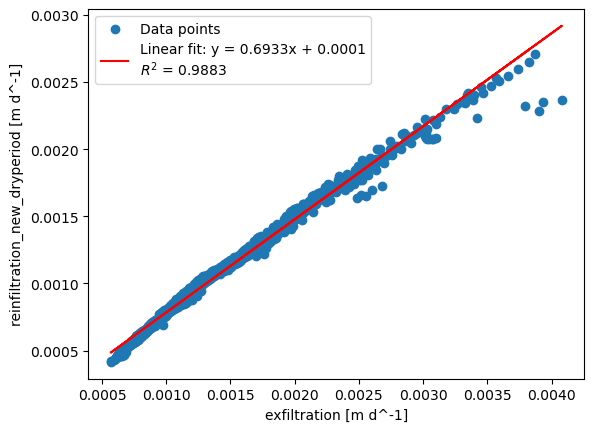

In [20]:
filtered_df = df.dropna(subset=['reinfiltration_new_dryperiod [m d^-1]'])

x = filtered_df['exfiltration [m d^-1]']
y = filtered_df['reinfiltration_new_dryperiod [m d^-1]']


plt.figure()
plt.scatter(x, y, label='Data points')
plt.xlabel('exfiltration [m d^-1]')
plt.ylabel('reinfiltration_new_dryperiod [m d^-1]')

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, slope * x + intercept, color='red', label=f'Linear fit: y = {slope:.4f}x + {intercept:.4f}\n$R^2$ = {r_value**2:.4f}')
plt.legend()
plt.show()



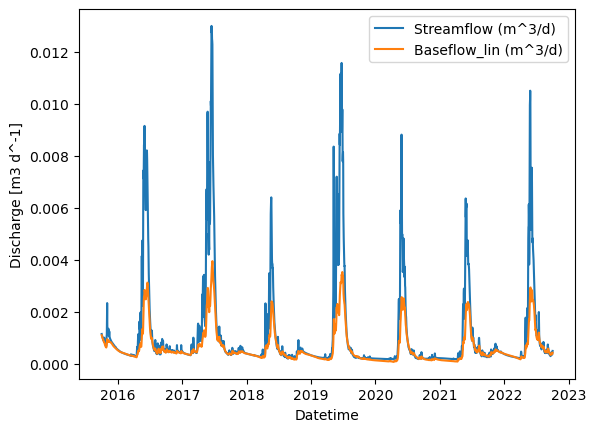

In [21]:
df['daily_reinfiltration_lin [m d^-1]'] = 0.6933 * df['exfiltration [m d^-1]'] + 0.0001
df['baseflow_lin [m d^-1]'] = df['exfiltration [m d^-1]'] - df['daily_reinfiltration_lin [m d^-1]']

plt.figure()
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/d)')
plt.plot(df['datetime'], df['baseflow_lin [m d^-1]'], label='Baseflow_lin (m^3/d)')
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 d^-1]')
plt.legend()
plt.show()

#### checking if there are days of baseflow greater than streamflow

In [26]:
df['baseflow_greater_than_runoff'] = df['baseflow_lin [m d^-1]'] > df['net runoff [m d^-1]']
dates_with_condition = df[df['baseflow_greater_than_runoff']]['datetime']
dates_with_condition


482    2016-01-26
483    2016-01-27
484    2016-01-28
485    2016-01-29
486    2016-01-30
          ...    
2915   2022-09-26
2916   2022-09-27
2917   2022-09-28
2918   2022-09-29
2919   2022-09-30
Name: datetime, Length: 560, dtype: datetime64[ns]

#### replace the days where baseflow is greater than streamflow by the baseflow of teh dry season, if avaiable: 

In [30]:
df['final_baseflow [m d^-1]'] = np.where(
    df['baseflow_greater_than_runoff'] & df['reinfiltration_new_dryperiod [m d^-1]'].notna(),
    df['GW_discharge_new_dryperiod [m d^-1]'],
    df['baseflow_lin [m d^-1]']
)


In [31]:
df['baseflow_greater_than_runoff_final'] = df['final_baseflow [m d^-1]'] > df['net runoff [m d^-1]']
dates_with_condition_final = df[df['baseflow_greater_than_runoff_final']]['datetime']
dates_with_condition_final

654    2016-07-16
655    2016-07-17
656    2016-07-18
657    2016-07-19
658    2016-07-20
          ...    
2911   2022-09-22
2915   2022-09-26
2917   2022-09-28
2918   2022-09-29
2919   2022-09-30
Name: datetime, Length: 284, dtype: datetime64[ns]

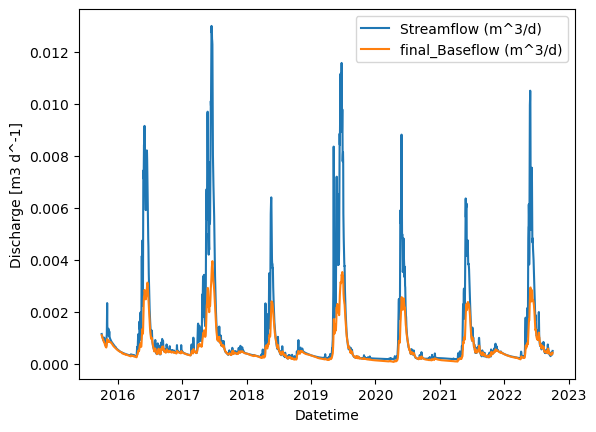

In [32]:
plt.figure()
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/d)')
plt.plot(df['datetime'], df['final_baseflow [m d^-1]'], label='final_Baseflow (m^3/d)')
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 d^-1]')
plt.legend()
plt.show()

# **The valid method ends here.**

#

#### log function

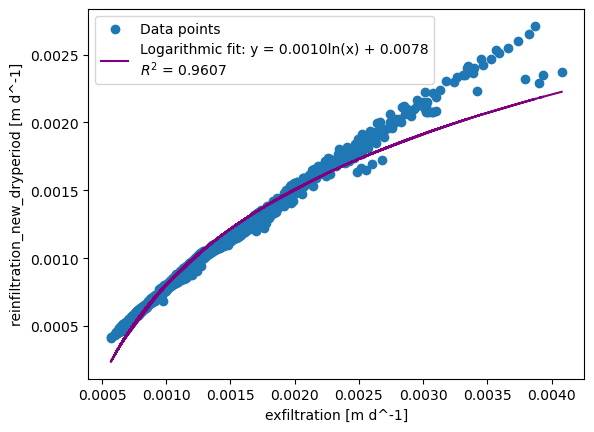

In [33]:
sorted_filtered_df = filtered_df.sort_values(by='GW_discharge_new_dryperiod [m d^-1]')
x = sorted_filtered_df['exfiltration [m d^-1]']
y = sorted_filtered_df['reinfiltration_new_dryperiod [m d^-1]']
def log_func(x, a, b):
    return a * np.log(x) + b

popt_log, pcov_log = curve_fit(log_func, x, y)
a_log, b_log = popt_log

y_log_fit = log_func(x, *popt_log)

residuals = y - y_log_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

plt.figure()
plt.scatter(x, y, label='Data points')
plt.plot(x, y_log_fit, color='purple', label=f'Logarithmic fit: y = {a_log:.4f}ln(x) + {b_log:.4f}\n$R^2$ = {r_squared:.4f}')
plt.xlabel('exfiltration [m d^-1]')
plt.ylabel('reinfiltration_new_dryperiod [m d^-1]')
plt.legend()
plt.show()

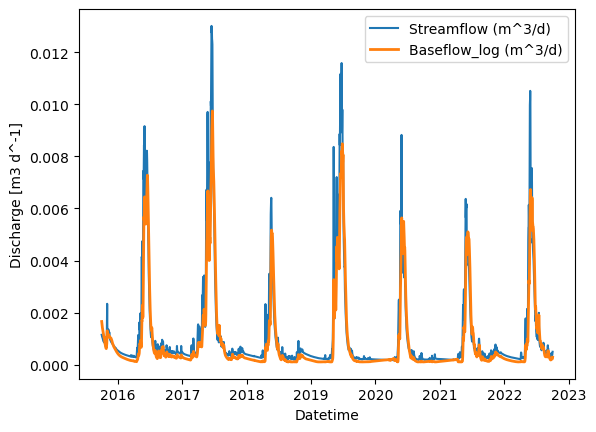

In [34]:
def calculate_y(exfiltration):
    return 0.001 * np.log(exfiltration) + 0.0078

df['daily_reinfiltration_log [m d^-1]'] = df['exfiltration [m d^-1]'].apply(calculate_y)

df['baseflow_log [m d^-1]'] = df['exfiltration [m d^-1]'] - df['daily_reinfiltration_log [m d^-1]']

plt.figure()
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/d)')
plt.plot(df['datetime'], df['baseflow_log [m d^-1]'], label='Baseflow_log (m^3/d)', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 d^-1]')
plt.legend()
plt.show()

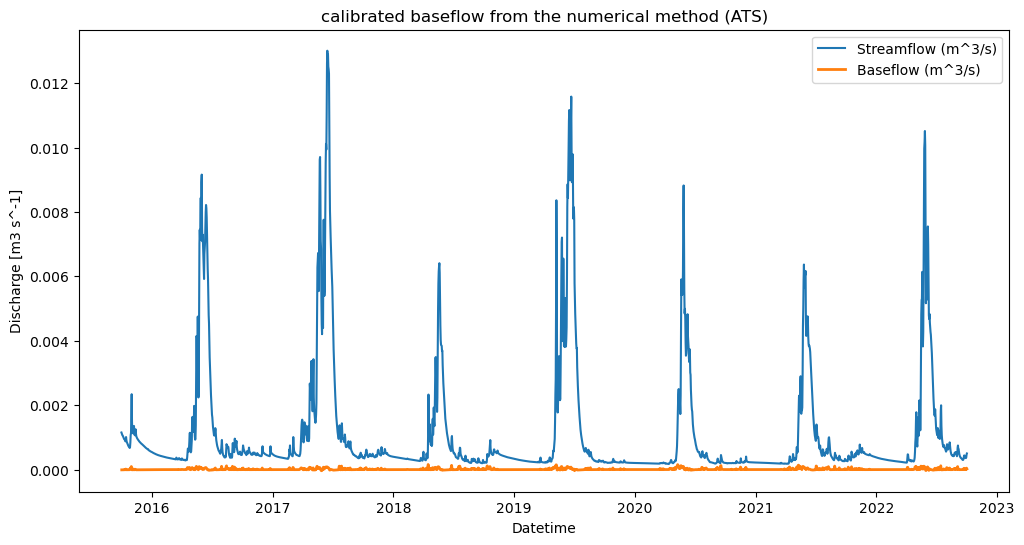

In [35]:
df['net exchange flux [m d^-1]'] = -df['net exchange flux [mol d^-1]'] / 55000. / surf_area
df['GW_discharge_complete_new [m d^-1]'] =  -df['subsurface water content change [m d^-1]'] - df['transpiration [m d^-1]'] + df['net exchange flux [m d^-1]']


plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/s)')
plt.plot(df['datetime'], df['GW_discharge_complete_new [m d^-1]'], label='Baseflow (m^3/s)', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 s^-1]')
plt.title('calibrated baseflow from the numerical method (ATS)')
plt.legend()
plt.show()

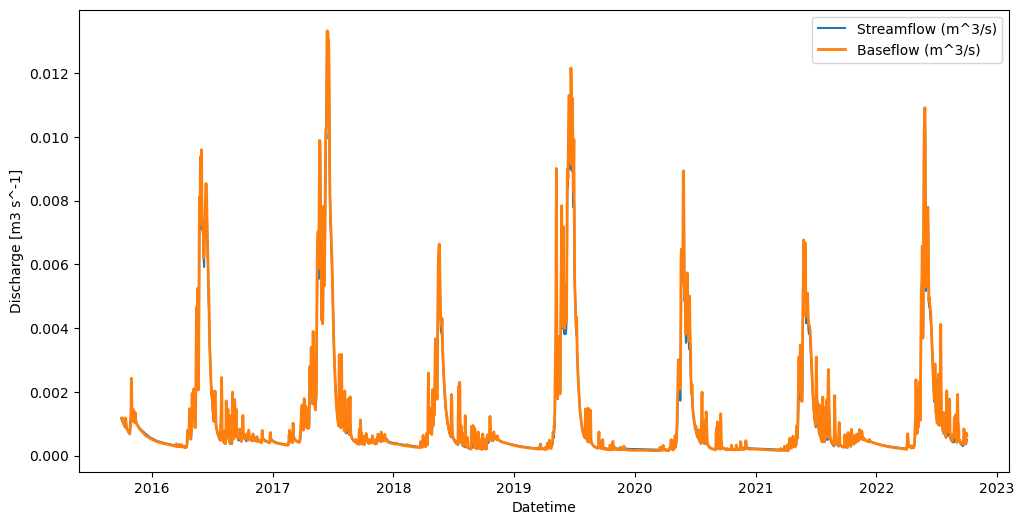

In [36]:
df['GW_discharge [m d^-1]'] =  -df['subsurface water content change [m d^-1]'] - df['transpiration [m d^-1]'] + df['rain precipitation [m d^-1]'] + df['snowmelt [m d^-1]']

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['net runoff [m d^-1]'], label='Streamflow (m^3/s)')
plt.plot(df['datetime'], df['GW_discharge [m d^-1]'], label='Baseflow (m^3/s)', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 s^-1]')
plt.legend()
plt.show()